In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
#from tqdm.auto import tqdm

In [7]:
%cd "C:\Users\Angel\Documents\NUS\Y3S2\DSA3101 Data Science in Practice\DSA3101\project_backend\sliding_window_data"
%pwd

# updated sliding window data dataset
df_sliding = pd.read_csv('sliding_window_data-full.csv', nrows=5000000)
df_sliding


#10min for 10mil rows
#~40s for 2mil rows
#3min for 5mil rows

C:\Users\Angel\Documents\NUS\Y3S2\DSA3101 Data Science in Practice\DSA3101\project_backend\sliding_window_data


,date,time,station,value,T1S1_time,T1S1_station number,T1S1_dist,T1S1_value,T1S2_time,T1S2_station number,...,T6S4_dist,T6S4_value,T6S5_time,T6S5_station number,T6S5_dist,T6S5_value,T6S6_time,T6S6_station number,T6S6_dist,T6S6_value
0,2023-02-03,00:10:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
1,2023-02-03,00:15:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
2,2023-02-03,00:20:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
3,2023-02-03,00:25:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
4,2023-02-03,00:30:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2020-11-29,05:15:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0
4999996,2020-11-29,05:20:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0
4999997,2020-11-29,05:25:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0
4999998,2020-11-29,05:30:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0


In [3]:
df_sliding['date'].nunique()

1121

In [4]:
df_clean = df_sliding.fillna(0.0)
df_clean

#3min for 10mil rows
#~10s for 2mil rows
#~1min for 5mil rows

,date,time,station,value,T1S1_time,T1S1_station number,T1S1_dist,T1S1_value,T1S2_time,T1S2_station number,...,T6S4_dist,T6S4_value,T6S5_time,T6S5_station number,T6S5_dist,T6S5_value,T6S6_time,T6S6_station number,T6S6_dist,T6S6_value
0,2023-02-03,00:10:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
1,2023-02-03,00:15:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
2,2023-02-03,00:20:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
3,2023-02-03,00:25:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
4,2023-02-03,00:30:00,S77,0.0,-35,S223,0.000135,0.0,-35,S222,...,0.000434,0.0,-60,S79,0.000655,0.0,-60,S77,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2020-11-29,05:15:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0
4999996,2020-11-29,05:20:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0
4999997,2020-11-29,05:25:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0
4999998,2020-11-29,05:30:00,S112,0.0,-35,S66,0.001224,0.0,-35,S100,...,0.004145,0.0,-60,S114,0.004250,0.0,-60,S112,0,0.0


In [5]:
origin_others_vals = ['T1S1_value',  'T1S2_value', 'T1S3_value', 'T1S4_value', 'T1S5_value', 'T1S6_value', 
'T2S1_value',  'T2S2_value', 'T2S3_value', 'T2S4_value', 'T2S5_value', 'T2S6_value', 
'T3S1_value',  'T3S2_value', 'T3S3_value', 'T3S4_value', 'T3S5_value', 'T3S6_value', 
'T4S1_value',  'T4S2_value', 'T4S3_value', 'T4S4_value', 'T4S5_value', 'T4S6_value', 
'T5S1_value',  'T5S2_value', 'T5S3_value', 'T5S4_value', 'T5S5_value', 'T5S6_value', 
'T6S1_value',  'T6S2_value', 'T6S3_value', 'T6S4_value', 'T6S5_value', 'T6S6_value']

X_all = df_clean.loc[:, origin_others_vals]
y_all = df_clean.loc[:, 'value']

In [6]:
# to check
y_all.isna().any()

False

## Train the model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=3101)

In [8]:
model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    grow_policy="lossguide",
    learning_rate=0.01,
    objective="reg:squarederror",
    reg_alpha=0.5,
    reg_lambda=0.5,
    tree_method="hist",
    random_state=3101,
)
model.fit(X_train, y_train)

train_forecasts = model.predict(X_train)

## Testing the model

In [9]:
test_forecasts = model.predict(X_test)

In [10]:
result = pd.DataFrame({'actual':y_test, 'predicted':test_forecasts})
result

,actual,predicted
470042,0.0,0.035499
2532526,0.0,0.035499
1950807,0.0,0.239129
113992,0.0,0.035499
1392129,0.0,0.035499
...,...,...
1982725,0.0,0.035499
4715387,0.0,0.035499
1159454,0.0,0.035499
3649223,0.0,0.035499


In [33]:
# Metric: MSE
test_mse = mean_squared_error(y_test, test_forecasts)

# Metric: MAE
test_mae = mean_absolute_error(y_test, test_forecasts)

threshold = 0.0
# Metric: FN rate --> Worst Case: Predicted no rain, but rained
fn = result[result['actual'] > threshold]  ## all actual positives
fn = fn[round(fn['predicted'], 1) <= threshold]
test_fnr = len(fn) / len(result[result['actual'] > threshold])

# Metric: FP rate --> 2nd Worst Case: Predicted rain, but no rain
fp = result[result['actual'] <= threshold]  ## all actual negatives
fp = fp[round(fp['predicted'], 1) > threshold]
test_fpr = len(fp) / len(result[result['actual'] <= threshold])

# Metric: R-squared score
test_r_squared = r2_score(y_test, test_forecasts)

In [34]:
# Metrics output
print("MSE is: {}".format(test_mse))
print("MAE is: {}".format(test_mae))
print("FN Rate is: {}".format(test_fnr))
print("FP Rate is: {}".format(test_fpr))
print("R-squared Score is: {}".format(test_r_squared))

MSE is: 0.0731450092782309
MAE is: 0.06335397317049417
FN Rate is: 0.3192377433370967
FP Rate is: 0.055364241412238314
R-squared Score is: 0.07025481395752153


## Already condensed above

In [13]:
# convert forecasts and actual values into binary classes, i.e. > 0.25 -> 1, <= 0.25 -> 0
test_forecasts_classed = []

for y in test_forecasts:
    test_forecasts_classed.append(1) if y >= 0.25 else test_forecasts_classed.append(0)
test_forecasts_classed = np.array(test_forecasts_classed)


y_test_classed = []

for y in y_test:
    y_test_classed.append(1) if y > 0.25 else y_test_classed.append(0)
y_test_classed = np.array(y_test_classed)

In [14]:
# Metric: MSE
test_mse = mean_squared_error(y_test, test_forecasts)
print("MSE is: {}".format(test_mse))
#print("Mean test data value: {}".format(np.mean(y_test)))

MSE is: 0.0731450092782309


In [15]:
# Metric: MAE
test_mae = mean_absolute_error(y_test, test_forecasts)
print("MAE is: {}".format(test_mae))

MAE is: 0.06335397317049417


In [16]:
# Metric: FN rate --> Worst Case: Predicted no rain, but rained
fn = result[result['actual'] > 0.0]  ## all actual positives
fn = fn[fn['predicted'] <= 0.0]
test_fnr = len(fn) / len(result[result['actual'] > 0.0])
print("FN Rate is: {}".format(test_fnr))

FN Rate is: 0.0


In [17]:
# Metric: FP rate --> 2nd Worst Case: Predicted rain, but no rain
fp = result[result['actual'] <= 0.0]  ## all actual negatives
fp = fp[round(fp['predicted'], 1) > 0.0]
test_fpr = len(fp) / len(result[result['actual'] <= 0.0])
print("FP Rate is: {}".format(test_fpr))

FP Rate is: 0.055364241412238314


In [18]:
# Metric: R-squared score
test_r_squared = r2_score(y_test, test_forecasts)
print("R-squared Score is: {}".format(test_r_squared))

R-squared Score is: 0.07025481395752153


## Plot of Forecasts vs Targets/Actual Values
### Not meaningful since data is no longer time-series / is shuffled

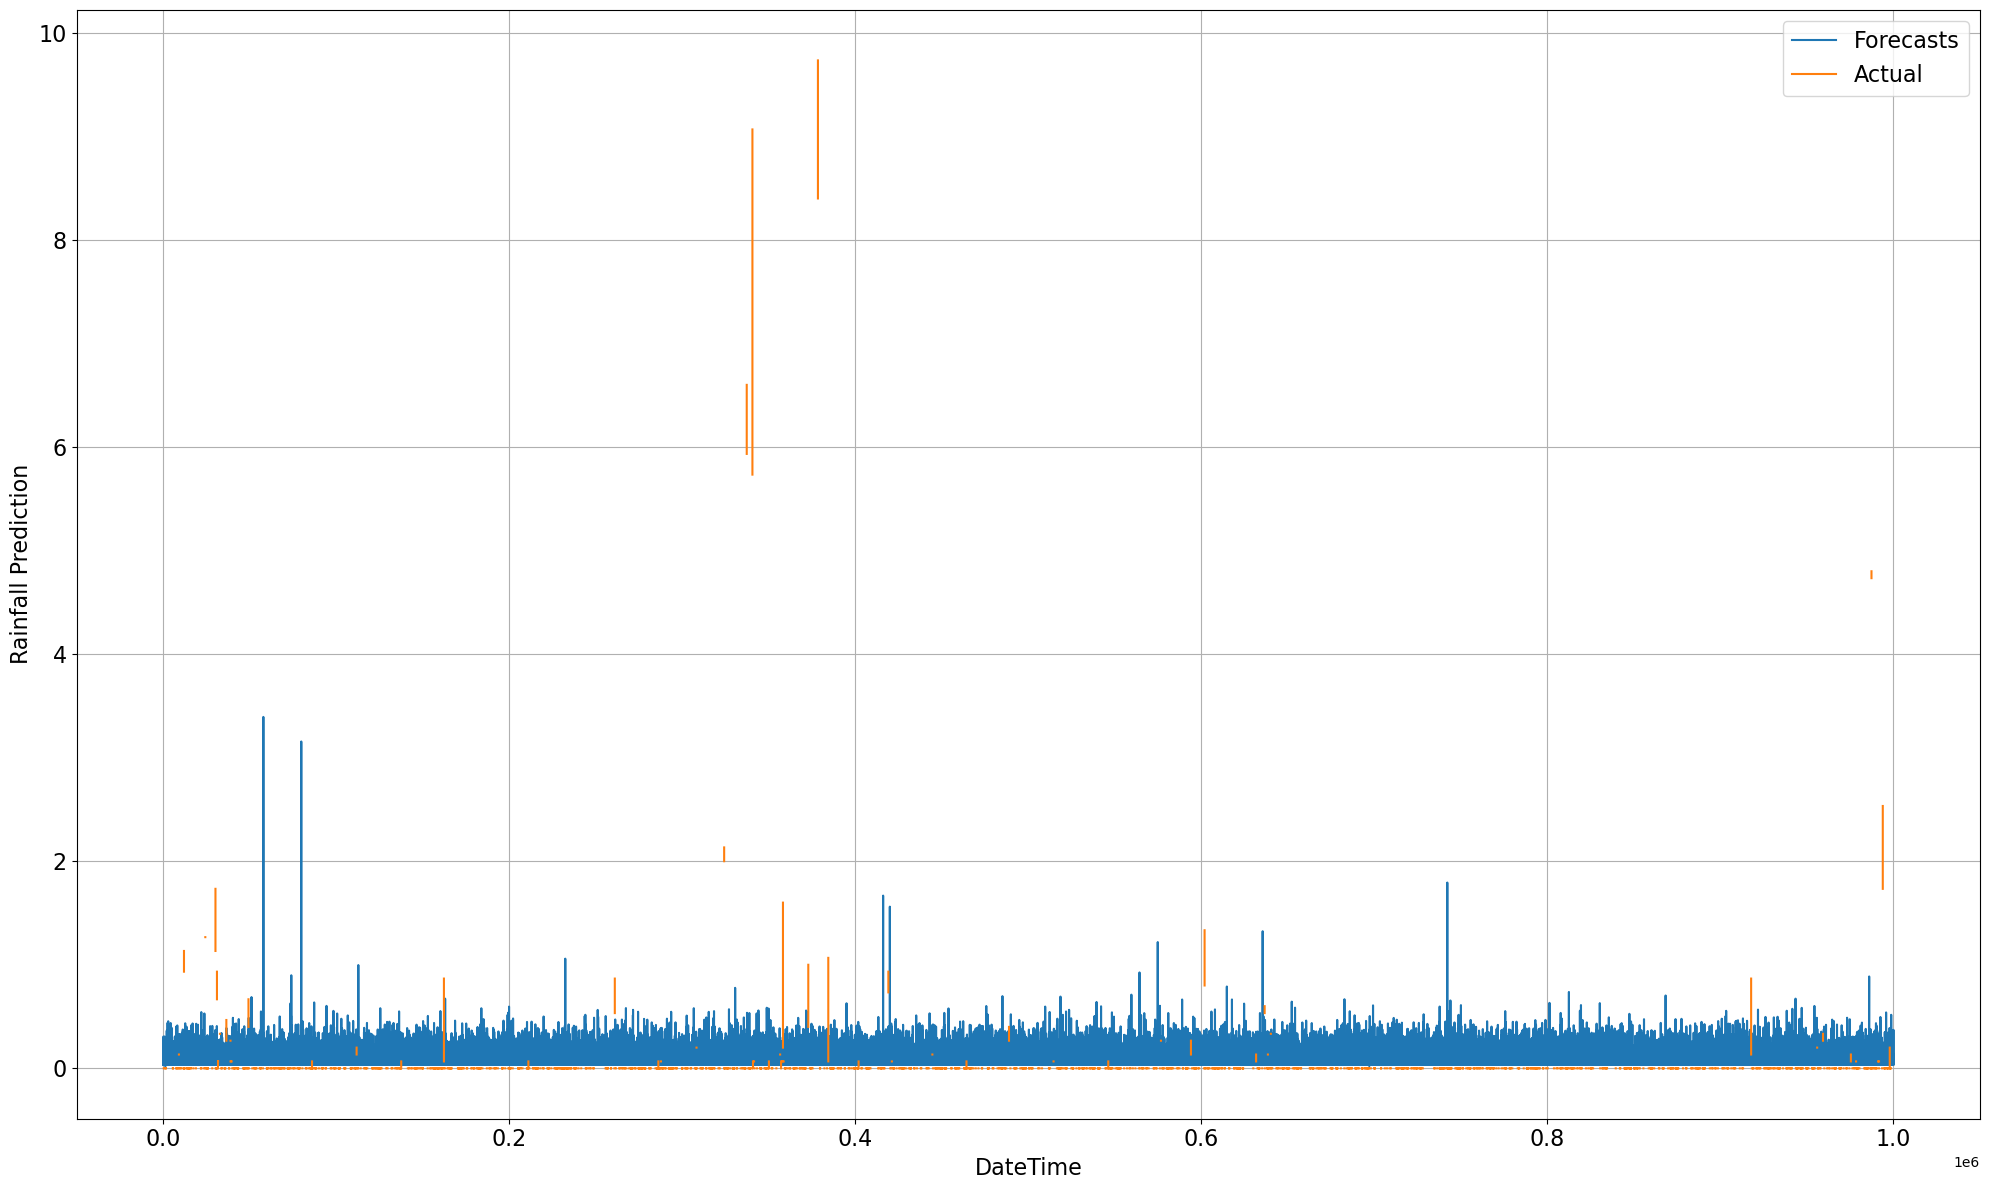

In [19]:
fontsize = 16
plot_df = pd.DataFrame({"Forecasts" : test_forecasts.flatten(), "Actual" : y_test}, index=range(len(y_test)))

fig = plt.figure(figsize=(20,12))
plt.plot(plot_df.index, plot_df["Forecasts"].rolling(3).mean(), label="Forecasts")
plt.plot(plot_df.index, plot_df["Actual"].rolling(3).mean(), label="Actual")

plt.xlabel('DateTime', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("Rainfall Prediction", fontsize=fontsize)
plt.grid(True)
plt.legend(fontsize=fontsize)
plt.tight_layout()